In [1]:
from script import *

In [2]:
microsoft = pd.read_csv('microsoft.csv')
del microsoft['Unnamed: 0']
microsoft.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_microsoft = microsoft[fields].describe().transpose()

In [3]:
summary_microsoft

,count,mean,std,min,25%,50%,75%,max
overall_ratings,526.0,3.722433,1.061423,1.0,3.0,4.0,5.0,5.0
work_balance_stars,526.0,3.832319,1.071795,1.0,3.0,4.0,5.0,5.0
culture_values_stars,526.0,3.687833,0.978436,1.0,3.0,3.7,4.0,5.0
carrer_opportunities_stars,526.0,3.560076,1.063079,1.0,3.0,4.0,4.0,5.0
comp_benefit_stars,526.0,4.030418,0.893376,1.0,3.5,4.0,5.0,5.0
senior_mangemnet_stars,526.0,3.148099,1.201660,1.0,2.0,3.0,4.0,5.0


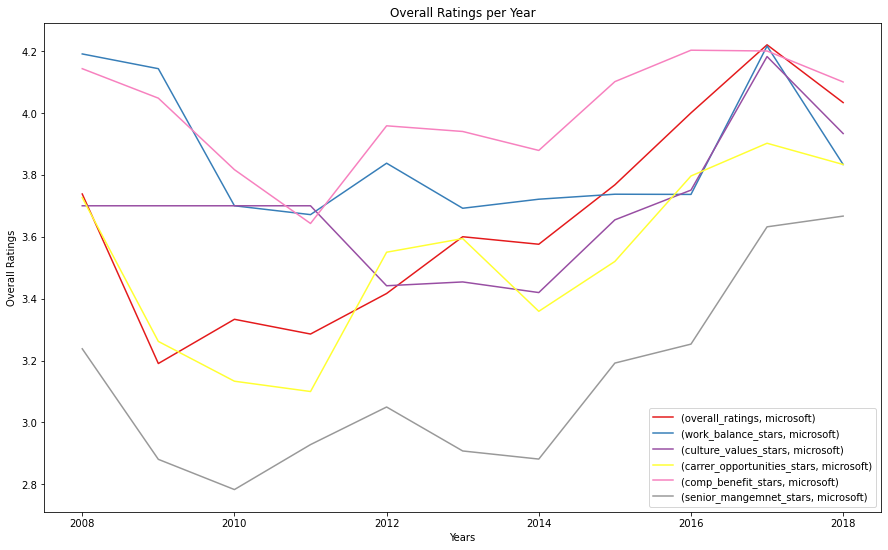

In [4]:
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
microsoft.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [5]:
corr_microsoft = corr_matrix(microsoft)
corr_microsoft

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.507352,0.635737,0.649684,0.507082,0.702221,-0.408256,-0.031119,0.060506
work_balance_stars,0.507352,1.000000,0.418678,0.389408,0.406673,0.424974,-0.188886,-0.100016,0.100862
culture_values_stars,0.635737,0.418678,1.000000,0.454501,0.344502,0.615337,-0.218275,-0.067693,-0.014032
carrer_opportunities_stars,0.649684,0.389408,0.454501,1.000000,0.495858,0.574876,-0.305251,-0.011747,0.096801
comp_benefit_stars,0.507082,0.406673,0.344502,0.495858,1.000000,0.359791,-0.236291,0.001499,0.028206
senior_mangemnet_stars,0.702221,0.424974,0.615337,0.574876,0.359791,1.000000,-0.314977,-0.096936,0.052287
helpful_count,-0.408256,-0.188886,-0.218275,-0.305251,-0.236291,-0.314977,1.000000,0.008315,-0.041887
Job_code,-0.031119,-0.100016,-0.067693,-0.011747,0.001499,-0.096936,0.008315,1.000000,-0.014726
Locations_code,0.060506,0.100862,-0.014032,0.096801,0.028206,0.052287,-0.041887,-0.014726,1.000000


In [6]:
df_train_microsoft = get_train_df(microsoft)
df_train_microsoft.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
355,5,5,3,3,5
152,3,3,3,3,3
211,3,3,3,4,3
299,5,4,3,5,3
462,3,3,3,3,2


  0%|          | 4/1000000 [00:00<12:30:21, 22.21it/s]



[('culture_values_stars', 'senior_mangemnet_stars'), ('carrer_opportunities_stars', 'comp_benefit_stars'), ('comp_benefit_stars', 'work_balance_stars'), ('senior_mangemnet_stars', 'carrer_opportunities_stars')]


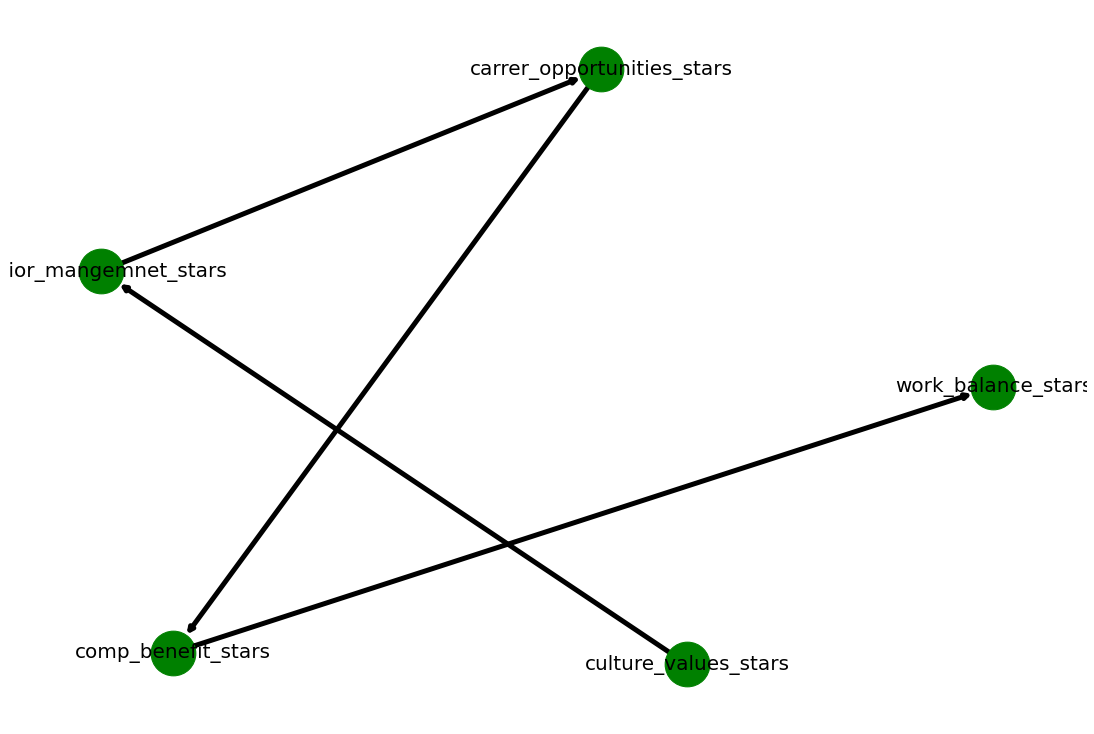

In [7]:
hc = HillClimbSearch(df_train_microsoft, scoring_method=K2Score(df_train_microsoft))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

In [8]:
model.fit(df_train_microsoft, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [9]:
print(infer.query(variables=['work_balance_stars', 'comp_benefit stars'], joint= True))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 435.70it/s]

Eliminating: culture_values_stars: 100%|██████████| 4/4 [00:00<00:00, 262.17it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0759 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1203 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.2595 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.3038 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.2405 |
+-----------------------+---------------------------+


In [10]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'comp_benefit_stars': i}))

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 418.68it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 339.49it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]


Eliminating: senior_mangemnet_stars:   0%|          | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]


Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 255.90it/s]



  0%|          | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]



  0%|          | 0/3 [00:00<?, ?it/s]



Finding Elimination Order: :

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.8000 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0000 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.2000 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0000 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0000 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.2857 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [14]:
causal_graph_microsoft = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;
carrer_opportunities_stars -> comp_benefit_stars; 
senior_mangemnet_stars -> carrer_opportunities_stars; 
culture_values_stars -> senior_mangemnet_stars;
comp_benefit_stars -> work_balance_stars;
culture_values_stars -> senior_mangemnet_stars;

}
"""

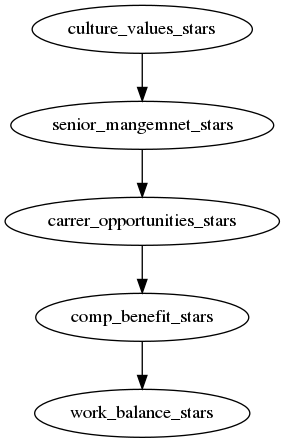

In [19]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='comp_benefit_stars'

model_microsoft= CausalModel(
        data = df_train_microsoft,
        graph=causal_graph_microsoft.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_microsoft.view_model()
display(Image(filename='causal_model_microsoft.png'))

In [20]:
estimands = model_microsoft.identify_effect()

In [21]:
estimate = model_microsoft.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
─────────────────────(Expectation(work_balance_stars|senior_mangemnet_stars,cu
d[comp_benefit_stars]                                                         

                    
lture_values_stars))
                    
Estimand assumption 1, Unconfoundedness: If U→{comp_benefit_stars} and U→work_balance_stars then P(work_balance_stars|comp_benefit_stars,senior_mangemnet_stars,culture_values_stars,U) = P(work_balance_stars|comp_benefit_stars,senior_mangemnet_stars,culture_values_stars)

## Realized estimand
b: work_balance_stars~comp_benefit_stars+senior_mangemnet_stars+culture_values_stars
Target units: ate

## Estimate
Mean value: 0.4112991023129644
p-value: [3.54917164e-05]
95.0% confidence interval: [[0.22055559 0.60204262]]



In [22]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel(mode,model_microsoft,estimands,estimate)

Refute: Add a Random Common Cause
Estimated effect:0.4112991023129644
New effect:0.4096928016453829

Refute: Use a subset of data
Estimated effect:0.4112991023129644
New effect:0.4116168927660129
p value:0.42000000000000004

Refute: Use a Placebo Treatment
Estimated effect:0.4112991023129644
New effect:0.0004838340373790251
p value:0.47

